In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\aishw\\Downloads\\creditcard.csv.zip')

print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [2]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum().sum()) # Total missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64


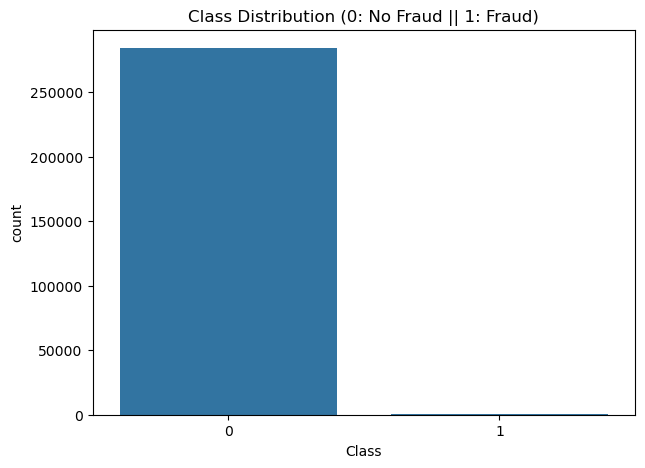

In [3]:
# Check the distribution of the 'Class' variable
class_distribution = df['Class'].value_counts()
print(class_distribution)

# Visualize the imbalance
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: No Fraud || 1: Fraud)')
plt.show()

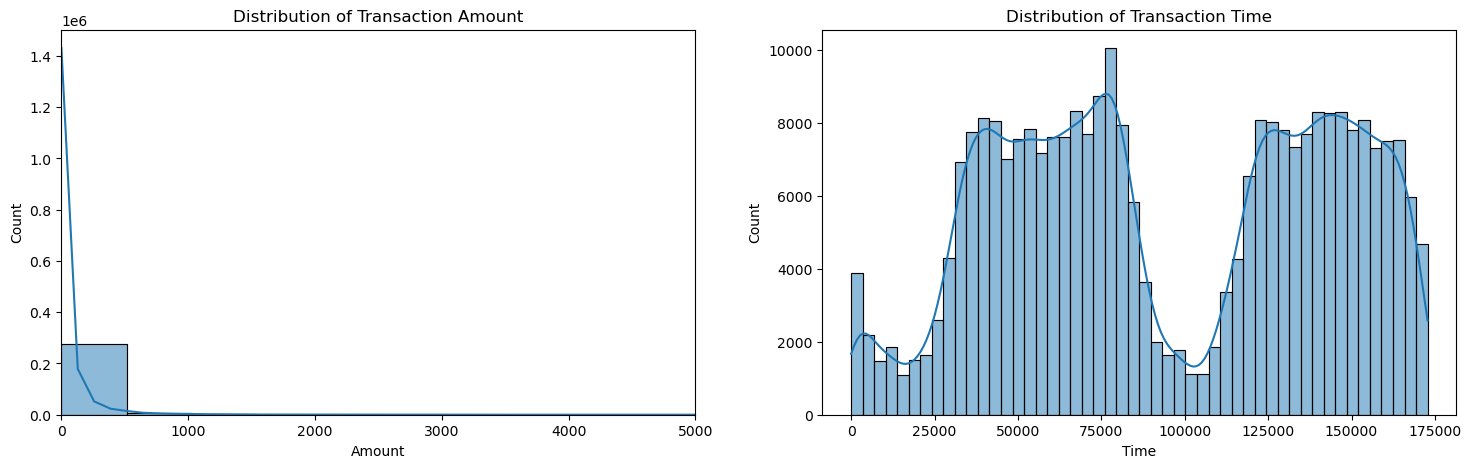

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Distribution of Transaction Amount
sns.histplot(df['Amount'], ax=axes[0], bins=50, kde=True)
axes[0].set_title('Distribution of Transaction Amount')
axes[0].set_xlim(0, 5000) # Limiting for better visibility

# Distribution of Transaction Time
sns.histplot(df['Time'], ax=axes[1], bins=50, kde=True)
axes[1].set_title('Distribution of Transaction Time')

plt.show()

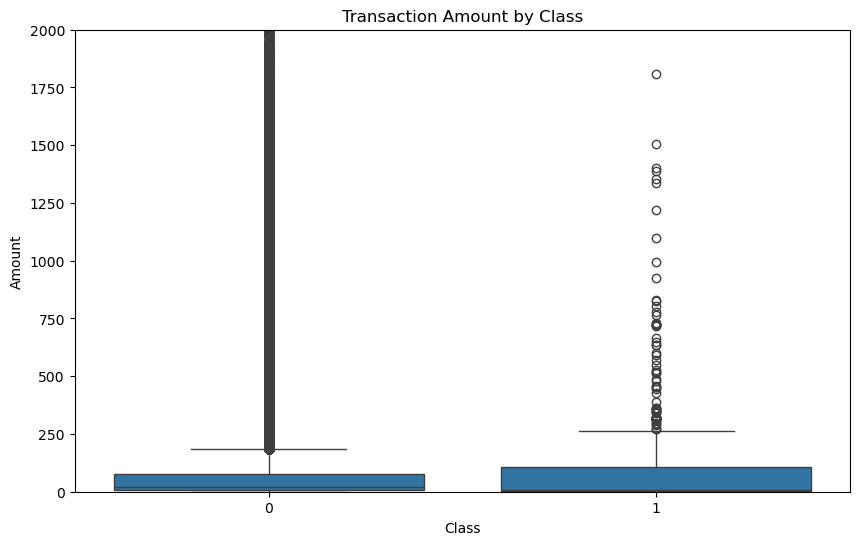

In [5]:
# Comparing Amount for both classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.ylim(0, 2000) # Limiting for better visibility
plt.show()

In [6]:
df = pd.read_csv('C:\\Users\\aishw\\Downloads\\creditcard.csv.zip')

In [7]:
from sklearn.preprocessing import RobustScaler

# Check if the original columns exist before processing
if 'Amount' in df.columns and 'Time' in df.columns:
    print("Scaling 'Amount' and 'Time' columns...")
    
    scaler = RobustScaler()

    df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
    df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

    # Drop the original 'Time' and 'Amount' columns
    df.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    print("Columns scaled and original columns dropped.")
else:
    print("Columns 'Amount' and 'Time' already processed or not found.")

Scaling 'Amount' and 'Time' columns...
Columns scaled and original columns dropped.


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Resampled class distribution:\n", y_train_resampled.value_counts())

Resampled class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# --- Model 1: Logistic Regression (on resampled data) ---
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)
print("--- Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))

# --- Model 2: Random Forest (on resampled data) ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

# --- Model 3: Isolation Forest (Anomaly Detection) ---
# Note: contamination is the expected proportion of outliers (frauds)
iso_forest = IsolationForest(contamination=0.00172, random_state=42)
iso_forest.fit(X_train) # Fit on original training data
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso[y_pred_iso == 1] = 0   # Inliers -> No Fraud
y_pred_iso[y_pred_iso == -1] = 1 # Outliers -> Fraud
print("\n--- Isolation Forest ---")
print(classification_report(y_test, y_pred_iso))

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


--- Isolation Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.33      0.32        98

    accuracy                           1.00     56962
   macro avg       0.65      0.66      0.66     569

In [12]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'fraud_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been saved successfully!")

Model and scaler have been saved successfully!
